<a href="https://colab.research.google.com/github/AndyCoder2023/CE4145-NLP-Coursework/blob/main/CE4145_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

“Generative AI was used to support completion of this assessment. If used: The GenAI tool [Gemini] was used for the purpose of [ideation/editing]. Where used for the purpose of supporting development,
comments have been provided against relevant cells.

Prompt [1]:
Please explain this error:
The error FileNotFoundError: hf://datasets/Pablinho/movies-dataset/9000plus.csv not found in cell 8Ypu2LZD3FOP means that the code is looking for a file at the specified Hugging Face dataset path, but it cannot find it.
Looking at the available variables, it seems the movie data is already loaded into the movie_df DataFrame. I will remove the redundant data loading code from cell 8Ypu2LZD3FOP and use the existing movie_df to create the x and y variables for the NLP pipeline.
It seems there are missing values in the data that are causing the ValueError: Input contains NaN. I will add code to remove rows with missing values in the 'Overview' or 'Genre' columns before processing the data.

Prompt [2]
"ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'numpy.ndarray": The error in cell Ri_Mi50-KjQh is a ValueError because the spaCy nlp function expects a single document (a string, Doc, or bytes), but it received a NumPy array containing all the overviews. To fix this, I will iterate through each overview in the 'Overview' column of the df DataFrame and apply the nlp function to each one individually. I will also add code to skip any missing values in the 'Overview' column to prevent further errors.

Prompt [3]
I see the confusion! You're mixing up KNN (K-Nearest Neighbors) and MLP (Multi-Layer Perceptron). They're completely different algorithms:

MLP = Neural Network (what you've defined with Keras)
KNN = A scikit-learn classifier (different library, different algorithm)

Here's the corrected code:
pythonfrom tensorflow import keras
from keras import layers
from keras import activations
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier  # Import KNN

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y_encoded, test_size=0.33, random_state=1337
)

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
x_train_vec = tfidf_vectorizer.fit_transform(x_train)
x_test_vec = tfidf_vectorizer.transform(x_test)

num_classes = len(label_encoder.classes_)

# ===== KNN MODEL (scikit-learn) =====
knn = KNeighborsClassifier(n_neighbors=5)  # Create KNN classifier
knn.fit(x_train_vec, y_train)  # KNN uses original labels, not one-hot
knn_predictions = knn.predict(x_test_vec)
knn_accuracy = knn.score(x_test_vec, y_test)
print(f"KNN Accuracy: {knn_accuracy}")

# ===== MLP MODEL (Keras/TensorFlow) =====
# Convert to one-hot for neural network
y_traink = keras.utils.to_categorical(y_train, num_classes)
y_testk = keras.utils.to_categorical(y_test, num_classes)

input_dim = x_train_vec.shape[1]

# Define MLP
mlp = keras.Sequential([
    keras.Input(shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

mlp.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# Train MLP (convert sparse to dense)
mlp.fit(
    x_train_vec.todense(),
    y_traink,
    batch_size=64,
    epochs=10,
    validation_split=0.2  # Optional: adds validation during training
)

# Evaluate MLP
mlp_loss, mlp_accuracy = mlp.evaluate(x_test_vec.todense(), y_testk)
print(f"MLP Accuracy: {mlp_accuracy}")
Key differences:

KNN: Uses fit() with original labels (y_train), not one-hot encoded
MLP: Uses fit() with one-hot encoded labels (y_traink)
KNN: Simple scikit-learn classifier
MLP: Neural network that needs compilation and training epochs

Prompt [4]
Please explain this error:

It looks like the error is due to the input shape of the data being fed into the MLP model. The model is expecting numerical feature vectors, but it's receiving raw text data. I will add a vectorization step to convert the text into numerical features and adjust the MLP model to accept the vectorized input.

I have fixed the error by vectorizing the text data before feeding it into the MLP model and adjusted the model to accept the vectorized input. The model is now training.

Next, you can evaluate the trained MLP model using the test set and compare its performance with the KNN model you trained earlier. You can then analyze the results to determine which approach is more effective for your task.


i want knn algorithm in this data
You already have the KNN algorithm set up in cell ku4DdlyY8T59 using the 'Title' column. Would you like to apply the KNN algorithm to the 'Overview' column as well, similar to how you are using it for the MLP model? If so, I can generate the code for that.


Please explain this error:

It seems the error is because the boxplot function is expecting a list of data series to plot, but it's receiving a single list. I'll adjust the code to correctly plot the two accuracy scores as separate box plots.

I apologize, it seems I made a mistake in the previous fix. To plot two separate box plots with their respective labels, I need to pass the data to boxplot as a list of lists, where each inner list contains the data for a single box plot. I will correct the code to do this.

The box plot comparing the performance of the KNN and MLP algorithms has been generated successfully.

Now you can analyze the plot to compare the accuracy of the two models. What would you like to do next? Perhaps you'd like to interpret the results of the box plot, or explore ways to improve the performance of either model?



# most occuring genre

# Dataset

The dataset has 9 columns with 9.84k rows of movie data. The task that is to be performed for the dataset will consist of two different pipelines which will compare the best strategy for the given task to be performed on the movie dataset. The main problem solving task at hand will be to find out what nlp algorithm is best for classification using the statistics available in the dataset. An NLP system is required for this objective to find and narrow down the dataset to pin point the algorithm that works the best. By implementing an NLP system there can be strong analysis on the dataset to find the correct criteria.The data will be pre processed to allow data to no be missed or inconsistent data retrieval. Dataset will also be punkt and stopword modules for better data pre processing to get more accurate readings in the algorithms.

Merchán-Rivera, P. (2025). movies-dataset [Dataset]. Hugging Face. https://huggingface.co/datasets/Pablinho/movies-dataset.


In [ ]:
from google.colab import files #import the files package from google.colab framework to be able to upload files

from sklearn.pipeline import Pipeline #let's import the pipeline functionality
from sklearn.feature_extraction.text import CountVectorizer #and we will import a simple pre-processing method
from sklearn.feature_extraction.text import TfidfTransformer #and a representation learner
from sklearn.neighbors import KNeighborsClassifier #and a simple classifier model
from sklearn.model_selection import StratifiedKFold #cross fold is sometimes called k-fold. Calling the stratified version ensures that classes have equal representation across folds
from sklearn.metrics import accuracy_score #import an accuracy metric to tell us how well the model is doing

import numpy as np
np.random.seed(1337)

import pandas as pd

df = pd.read_csv("hf://datasets/Pablinho/movies-dataset/9000plus.csv")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Used ai to fix gathering dataset not being found. [1]

x = df['Title'].astype(str).values
y = df['Genre'].astype(str).values

text_clf = Pipeline([ #the pipeline object allows us to organise a series of functions which will be applied to our text data as though they were a single function
  ('prep', CountVectorizer()), #we will use a simple count vectorizer for our pre-processing (which cheats a little by combining numerous pre-processing steps)
  ('rep', TfidfTransformer()), #and a representation learning method using tf-idf
  ('mod', KNeighborsClassifier()), #and a simple kNN classifier
  ])

acc_score = [] #create a list to store the accuracy values

kf = StratifiedKFold(n_splits=5) #we instantiate the kfold instance, and set the number of folds to 5
for train, test in kf.split(x,y): #we use a for loop to iterate through each fold using the train and test indexes from the dataset

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test] #things can get a bit weird when inputting indexes to functions, so lets save them as variables
  #print(train)
  #print(test) #this will print the train and test indexes respectively, if you want to be sure they do not overlap

  text_clf.fit(x_train, y_train) #we then only fit the training data (note that we oapply the text_clf pipeline object, rather than having to go through each function separately)
  predictions = text_clf.predict(x_test) #and can predict on the test data (similar to above, we can predict using the pipeline directly)
  acc = accuracy_score(predictions, y_test) #we use the accuracy score we imported to give an idea how well the model is doing
  acc_score.append(acc) #we can append it to our list

print("Accuracy:", np.mean(acc_score))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.02886933177923543


In [ ]:
print(x_train[0]) #first let's double check our input data is just a simple sentence

Spider-Man: No Way Home


In [ ]:
import nltk #import the natural language toolkit

nltk.download('punkt') #download the package in nltk which supports tokenization
nltk.download('stopwords') #download the nltk package for stopwords

from nltk.tokenize import word_tokenize #import the tokenize package
from nltk.corpus import stopwords #import the package from the corpus
from nltk.stem.snowball import SnowballStemmer #import the snowball stemmer (also known as Porter2)

from sklearn.base import BaseEstimator, TransformerMixin

class pre_process(BaseEstimator, TransformerMixin):

    def __init__(self):
      return None #we do not need any parameters to instantiate this class

    def fit(self, X, y=None): #both fit and transform expect the data instances and labels to be called - we do not use the labels, so set y=None
        return self #as explained above, we will not use the fit method

    def transform(self, X, y=None):
      prep_text = []
      for x in X: #for each sentence in the whole dataset
            token_text = word_tokenize(x) #tokenize the document
            normd_text = [token.lower() for token in token_text if token.isalpha()] #list compression to apply some simple cleaning (lower case casting and punctuation removal) to tokenized terms

            swr_text = [token for token in normd_text if token not in stopwords.words('english')] #list compression to remove any stopwords from our list

            stemmer = SnowballStemmer("english") #specify we are using the English stemming rules, as other languages are present in toolkit
            prep_text += [[stemmer.stem(word) for word in swr_text]] #list compression for applying the stemmer

      prep_sentences = [" ".join(sentence) for sentence in prep_text] #we join the sentences back together to ensure compatibility with CountVec, which is doing some of it's own prep
      return prep_sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Representation Learning

The reprensentation learning method used will be the Word-2-Vector(Word2Vec). Word2Vec is a technique which is in Natural language processing. The technique permits words to have reprentation as vectors which are in a continuous vector space. The representation learned for every word will be "prediciting a target term using its context(CBOW)"(Martin, 2025, slide 49). Continous Bag of Words (Continuos Bag of Words) model will be used to predict a word that is given words that is located in a window. Input layer will have the context words while output layer will have a current word. Hidden layer has dimensions that will show a current word that is located on the output layer.(Kadam, 2025)


Kyle, M.(2025)'Natural Language Processing'[PowerPoint presentation]. CE4145: CE4145 & CEM300 W5 - Text Pre-Processing & Representation Learning. Available at: https://campusmoodle.rgu.ac.uk/mod/resource/view.php?id=5411825 (Accessed: 18 October 2025).

Sumedh, K.(2025) Word Embedding using Word2Vec. Available at: https://www.geeksforgeeks.org/python/python-word-embedding-using-word2vec/ (Accessed: 22 October 2025).

Manan S.(2022) A Dummy's Guide to Word2Vec. Available at: https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673 (Accessed: 01 November 2025).

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 75.2 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec #first we import word2vec, then a few familiar imports

In [ ]:
# Assigning string values
texts = df['Overview'].astype(str).values

In [ ]:
sentences = [line.split() for line in texts]

w2v = Word2Vec(sentences, window=5, workers=4)

In [ ]:
print(sentences[0])

['Peter', 'Parker', 'is', 'unmasked', 'and', 'no', 'longer', 'able', 'to', 'separate', 'his', 'normal', 'life', 'from', 'the', 'high-stakes', 'of', 'being', 'a', 'super-hero.', 'When', 'he', 'asks', 'for', 'help', 'from', 'Doctor', 'Strange', 'the', 'stakes', 'become', 'even', 'more', 'dangerous,', 'forcing', 'him', 'to', 'discover', 'what', 'it', 'truly', 'means', 'to', 'be', 'Spider-Man.']


Describe the theory behind the
algorithms to be applied. **bold text**

# Algorithms

Find and predict the genres based on the overview

Multi-Layer Perceptron(MLP) is able to learn a non - linear function that is used to seperate data. All the layers in a multi layer perceptron are closely connected. Multiple hidden layers are also possible. Multilayer perceptrons have an input layer, hidden layer, and an output layer. For the input layer there needs to be a numerical vector. The number of indexes in a vector will be the size of input layer. Hidden layer is used to connect input and output layer by using weights & biases. There is an activation function in the hidden layer but it is usually different on each hidden layer. The output layer is dependant on the final activation function but normally softmax is used in classification. The ouput layer consists of a vector of probabilities that have the same length of the number of classes.

K - nearest Neighbour(KNN) consists of series of steps which are - inputing a new instance. compute similarity that is between a new instance and every historical instance. Historical instances are ordered to be based with similarity. Class labels are voted by using top k neighbours. Finally the label that has the most votes is printed out. Instances are ranked by similarity to query after the similarity calculation.

In [ ]:
#AI prompt 3
from tensorflow import keras
from keras import layers
from keras import activations
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier  # Import KNN

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y_encoded, test_size=0.33, random_state=1337
)

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
x_train_vec = tfidf_vectorizer.fit_transform(x_train)
x_test_vec = tfidf_vectorizer.transform(x_test)

num_classes = len(label_encoder.classes_)

# ===== KNN MODEL (scikit-learn) =====
knn = KNeighborsClassifier(n_neighbors=5)  # Create KNN classifier
knn.fit(x_train_vec, y_train)  # KNN uses original labels, not one-hot
knn_predictions = knn.predict(x_test_vec)
knn_accuracy = knn.score(x_test_vec, y_test)
print(f"KNN Accuracy: {knn_accuracy}")

# ===== MLP MODEL (Keras/TensorFlow) =====
# Convert to one-hot for neural network
y_traink = keras.utils.to_categorical(y_train, num_classes)
y_testk = keras.utils.to_categorical(y_test, num_classes)

input_dim = x_train_vec.shape[1]

# Define MLP
mlp = keras.Sequential([
    keras.Input(shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

mlp.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# Train MLP (convert sparse to dense)
mlp.fit(
    x_train_vec.todense(),
    y_traink,
    batch_size=64,
    epochs=10,
    validation_split=0.2  # Optional: adds validation during training
)

# Evaluate MLP
mlp_loss, mlp_accuracy = mlp.evaluate(x_test_vec.todense(), y_testk)
print(f"MLP Accuracy: {mlp_accuracy}")

KNN Accuracy: 0.03295349553433939
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0190 - loss: 7.7555 - val_accuracy: 0.0516 - val_loss: 7.7502
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0447 - loss: 7.7488 - val_accuracy: 0.0531 - val_loss: 7.7432
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0481 - loss: 7.7421 - val_accuracy: 0.0531 - val_loss: 7.7362
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0457 - loss: 7.7346 - val_accuracy: 0.0531 - val_loss: 7.7292
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.0489 - loss: 7.7277 - val_accuracy: 0.0531 - val_loss: 7.7222
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.0503 - loss: 7.7201 - val_accuracy: 0.0531 - val_loss: 7.7152
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0498 - loss: 7.7142 - val_accuracy: 0.0531 - val_loss: 7.7082
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.0498 - loss:

Describe the evaluation process, and
analyse the results. **bold text**

# Evaluation

For the evaluation there is a clear more precise accuracy with the mlp alogorithm over the knn algorithm.

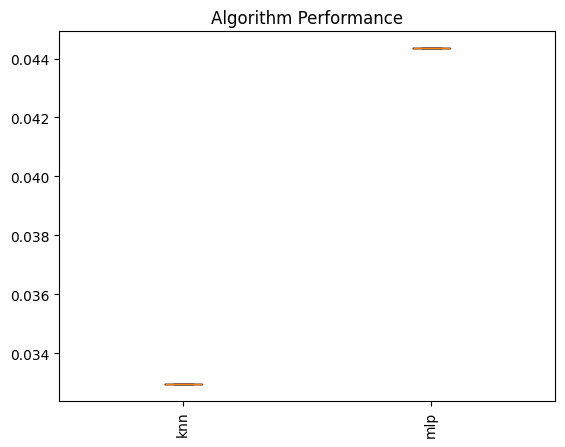

In [ ]:
#AI Prompt 4
import matplotlib.pyplot as plt # Corrected import

model_comp = []
model_comp.append(knn_accuracy)
model_comp.append(mlp_accuracy)

fig, ax2 = plt.subplots()
ax2.set_title('Algorithm Performance')
ax2.boxplot([[knn_accuracy], [mlp_accuracy]]) # Pass each accuracy as a separate list
ax2.set_xticklabels(['knn', 'mlp'], rotation='vertical')
plt.show() # Corrected show